In [3]:
# Import the matplotlib.pyplot submodule and name it plt
import matplotlib.pyplot as plt

import pandas as pd

In [21]:
seattle_weather = pd.read_csv('seattle_weather.csv')
seattle_weather = seattle_weather[:12]
austin_weather = pd.read_csv('austin_weather.csv')

### Adding data to an Axes object

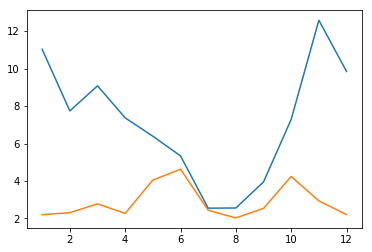

In [22]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot MLY-PRCP-NORMAL from seattle_weather against the MONTH
ax.plot(seattle_weather["DATE"], seattle_weather['MLY-PRCP-NORMAL'])

# Plot MLY-PRCP-NORMAL from austin_weather against MONTH
ax.plot(austin_weather["DATE"], austin_weather['MLY-PRCP-NORMAL'])

# Call the show function
plt.show()

### Customizing data appearance

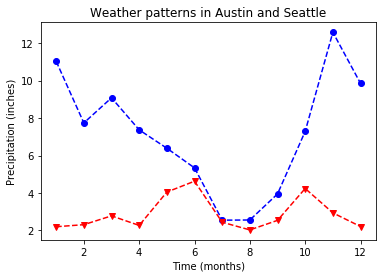

In [23]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot Seattle data, setting data appearance
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-PRCP-NORMAL"], color='b', marker='o', linestyle='--')

# Plot Austin data, setting data appearance
ax.plot(austin_weather["DATE"], austin_weather["MLY-PRCP-NORMAL"], color='r', marker='v', linestyle='--')

# Customize the x-axis label
ax.set_xlabel("Time (months)")

# Customize the y-axis label
ax.set_ylabel("Precipitation (inches)")

# Add the title
ax.set_title("Weather patterns in Austin and Seattle")

# Call show to display the resulting plot
plt.show()

### Creating small multiples with plt.subplots

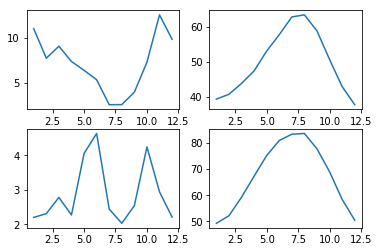

In [24]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['DATE'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1 , 0].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1 , 1].plot(austin_weather['DATE'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

### Small multiples with shared y axis

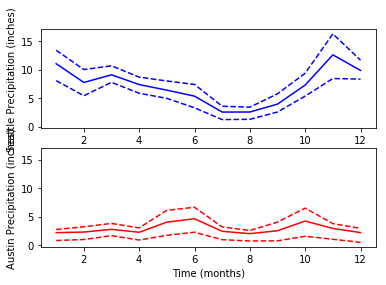

In [30]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
fig, ax = plt.subplots(2, 1, sharey=True)   #sharey to make the subplots have the same y limit

# Plot Seattle precipitation data in the top axes
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-NORMAL'], color = 'b')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-25PCTL'], color = 'b', linestyle = '--')
ax[0].plot(seattle_weather['DATE'], seattle_weather['MLY-PRCP-75PCTL'], color = 'b', linestyle = '--')

# Plot Austin precipitation data in the bottom axes
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-NORMAL'], color = 'r')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-25PCTL'], color = 'r', linestyle = '--')
ax[1].plot(austin_weather['DATE'], austin_weather['MLY-PRCP-75PCTL'], color = 'r', linestyle = '--')

ax[0].set_ylabel("Seattle Precipitation (inches)")
ax[1].set_ylabel("Austin Precipitation (inches)")
ax[1].set_xlabel("Time (months)")

plt.show()

### Read data with a time index

In [32]:
# Import pandas as pd
import pandas as pd

# Read the data from file using read_csv
climate_change = pd.read_csv('climate_change.csv', parse_dates=['date'], index_col='date')
climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


### Plot time-series data

C:\Users\hp\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


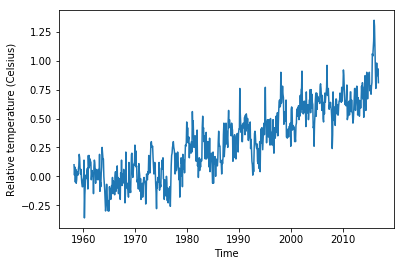

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index, climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel('Time')

# Set the y-axis label
ax.set_ylabel('Relative temperature (Celsius)')

# Show the figure
plt.show()

### Using a time index to zoom in

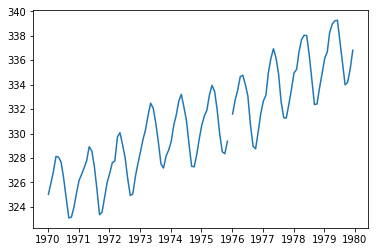

In [34]:
import matplotlib.pyplot as plt

# Use plt.subplots to create fig and ax
fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"
seventies = climate_change["1970-01-01" : "1979-12-31"]

# Add the time-series for "co2" data from seventies to the plot
ax.plot(seventies.index, seventies["co2"])

# Show the figure
plt.show()

### Plotting two variables that share the x-axis with different y axes

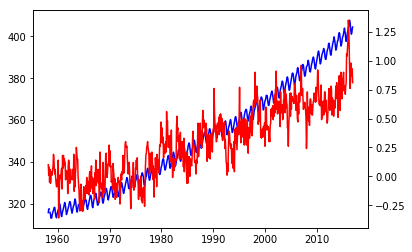

In [35]:
import matplotlib.pyplot as plt

# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index, climate_change['co2'], color='b')

# Create a twin Axes that shares the x-axis with different y axes
ax2 = ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index, climate_change['relative_temp'], color='r')

plt.show()

### Impleminting a function that plots time-series data

In [37]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

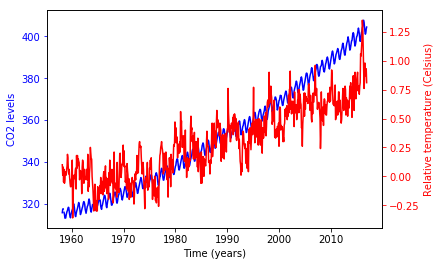

In [38]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], "blue", "Time (years)", "CO2 levels")

# Create a twin Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], "red", "Time (years)", "Relative temperature (Celsius)")
plt.show()

### Annotating a plot of time-series data

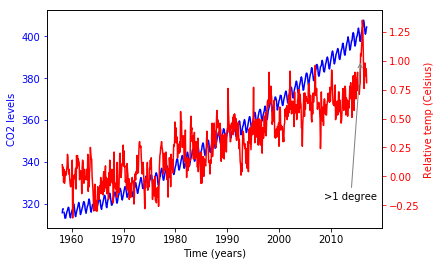

In [40]:
fig, ax = plt.subplots()

# Plot the CO2 levels time-series in blue
plot_timeseries(ax, climate_change.index, climate_change['co2'], 'blue', "Time (years)", "CO2 levels")

# Create an Axes object that shares the x-axis
ax2 = ax.twinx()

# Plot the relative temperature data in red
plot_timeseries(ax2, climate_change.index, climate_change['relative_temp'], 'red', "Time (years)", "Relative temp (Celsius)")

# Annotate point with relative temperature >1 degree
ax2.annotate(">1 degree", xy=[pd.Timestamp('2015-10-06'), 1], xytext=[pd.Timestamp('2008-10-06'), -.2], arrowprops={'arrowstyle':'->', 'color':"gray"})

plt.show()

### Stacked bar chart

In [42]:
medals = pd.read_csv('medals_by_country_2016.csv', index_col=0)
medals.head()

,Bronze,Gold,Silver
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30


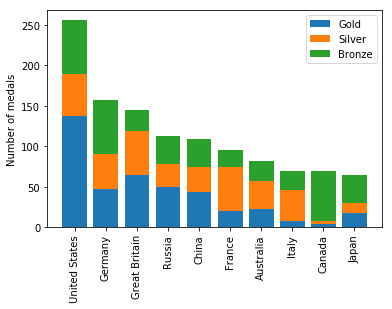

In [47]:
fig, ax = plt.subplots()

# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label="Gold")

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom=medals['Gold'], label='Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom=medals['Gold']+medals['Silver'], label='Bronze')

# Display the legend
ax.legend()

# Set the x-axis tick labels to the country names
ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of medals")

plt.show()

### Creating histograms

In [96]:
import re
summer_2016_medals = pd.read_csv('summer2016.csv')
mens_rowing = summer_2016_medals[summer_2016_medals['Event'].str.contains("Rowing Men's")]
mens_gymnastics = summer_2016_medals[summer_2016_medals['Event'].str.contains("Gymnastics Men's")]

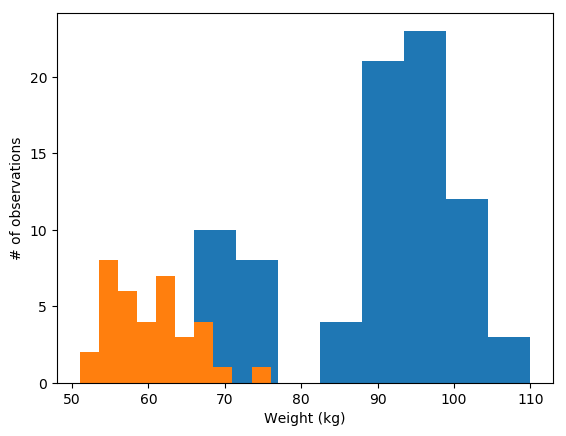

In [97]:
fig, ax = plt.subplots()
# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'])

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'])

# Set the x-axis label to "Weight (kg)"
ax.set_xlabel("Weight (kg)")

# Set the y-axis label to "# of observations"
ax.set_ylabel("# of observations")

plt.show()

### step histogram

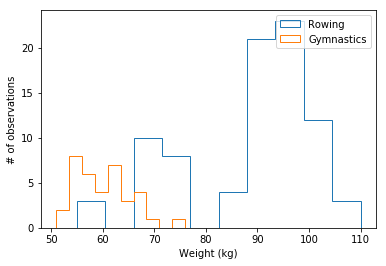

In [65]:
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype='step', label="Rowing", bins=10)

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype='step', label="Gymnastics",bins=10)

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

### Adding error-bars to a bar chart

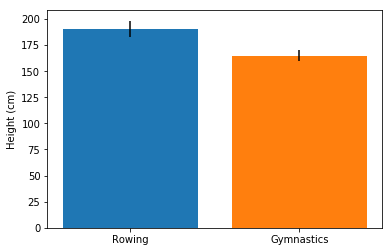

In [66]:
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel("Height (cm)")

plt.show()

### Adding error-bars to a plot

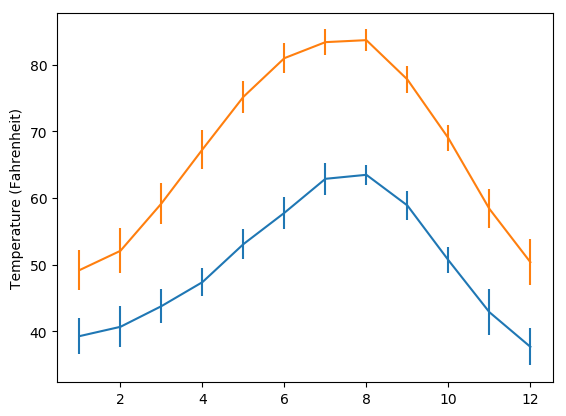

In [78]:
fig, ax = plt.subplots()

# Add Seattle temperature data in each month with error bars
ax.errorbar(seattle_weather['DATE'], seattle_weather["MLY-TAVG-NORMAL"], seattle_weather["MLY-TAVG-STDDEV"])

# Add Austin temperature data in each month with error bars
ax.errorbar(austin_weather['DATE'], austin_weather["MLY-TAVG-NORMAL"], austin_weather["MLY-TAVG-STDDEV"]) 

# Set the y-axis label
ax.set_ylabel("Temperature (Fahrenheit)")

plt.show()

### Creating boxplots

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


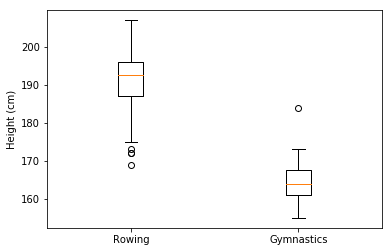

In [69]:
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

### Simple scatter plot

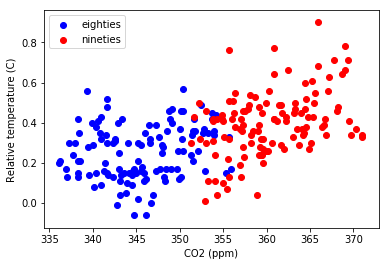

In [73]:
fig, ax = plt.subplots()

eighties = climate_change['1980-1-1' : '1989-12-31']
nineties = climate_change['1990-1-1' : '1999-12-31']

# Add data: "co2" on x-axis, "relative_temp" on y-axis
ax.scatter(eighties['co2'], eighties['relative_temp'], color='b', label='eighties')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='r', label='nineties')

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel("CO2 (ppm)")

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel("Relative temperature (C)")

ax.legend()

plt.show()

### Encoding time by color

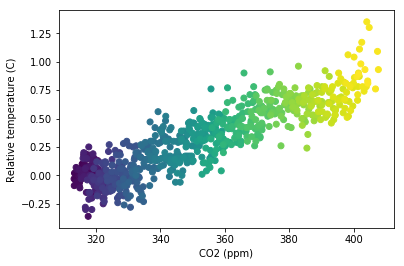

In [71]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

### Switching between styles

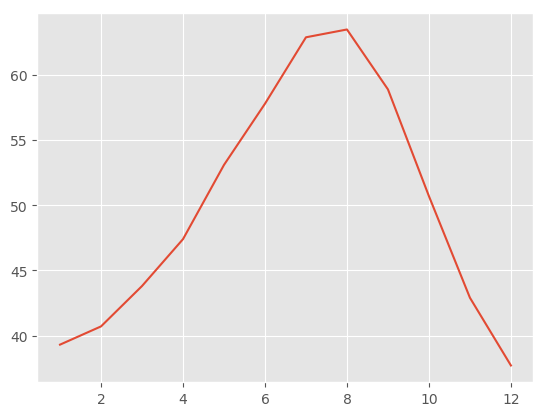

In [80]:
# Use the "ggplot" style and create new Figure/Axes
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.plot(seattle_weather["DATE"], seattle_weather["MLY-TAVG-NORMAL"])
plt.show()

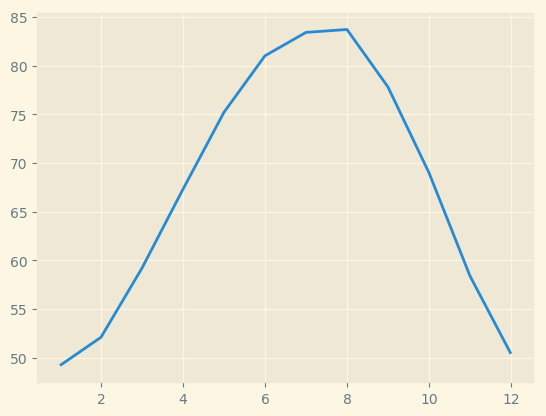

In [82]:
# Use the "Solarize_Light2" style and create new Figure/Axes
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
ax.plot(austin_weather["DATE"], austin_weather["MLY-TAVG-NORMAL"])
plt.show()

### Saving a file

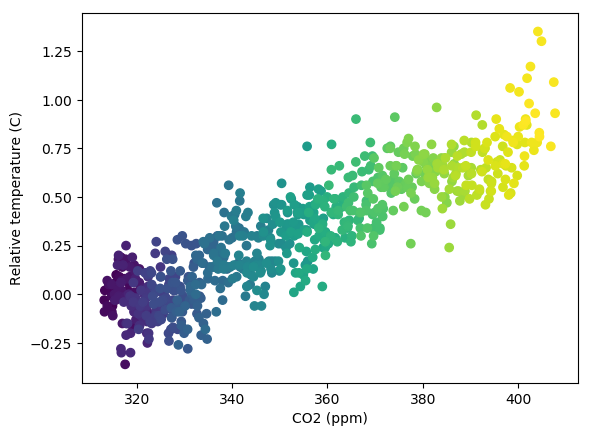

In [86]:
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

# Save as a PNG file
fig.savefig('my_figure.png')

In [87]:
# Save as a PNG file with 300 dpi
fig.savefig('my_figure_300dpi.png', dpi=300)

In [88]:
# Set figure dimensions and save as a PNG
fig.set_size_inches([3,5])
fig.savefig('figure_3_5.png')

### Automate your visualization

In [98]:
# Extract the "Sport" column
sports_column = summer_2016_medals['Sport']

# Find the unique values of the "Sport" column
sports = sports_column.unique()

# Print out the unique sports values
print(sports)

['Rowing' 'Taekwondo' 'Handball' 'Wrestling' 'Gymnastics' 'Swimming'
 'Basketball' 'Boxing' 'Volleyball' 'Athletics' 'Rugby Sevens' 'Judo'
 'Rhythmic Gymnastics' 'Weightlifting' 'Equestrianism' 'Badminton'
 'Water Polo' 'Football' 'Fencing' 'Shooting' 'Sailing' 'Beach Volleyball'
 'Canoeing' 'Hockey' 'Cycling' 'Tennis' 'Diving' 'Table Tennis'
 'Triathlon' 'Archery' 'Synchronized Swimming' 'Modern Pentathlon'
 'Trampolining' 'Golf']


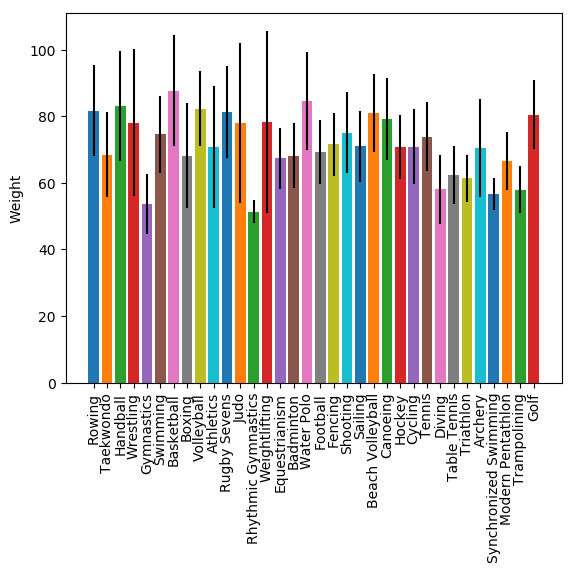

In [99]:
fig, ax = plt.subplots()

# Loop over the different sports branches
for sport in sports:
  # Extract the rows only for this sport
  sport_df = summer_2016_medals[summer_2016_medals['Sport'] == sport]
  # Add a bar for the "Weight" mean with std y error bar
  ax.bar(sport, sport_df['Weight'].mean(), yerr = sport_df['Weight'].std())

ax.set_ylabel("Weight")
ax.set_xticklabels(sports, rotation=90)

# Save the figure to file
fig.savefig('sports_weights.png')